In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data=pd.read_csv("student-mat.csv")
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

<AxesSubplot:>

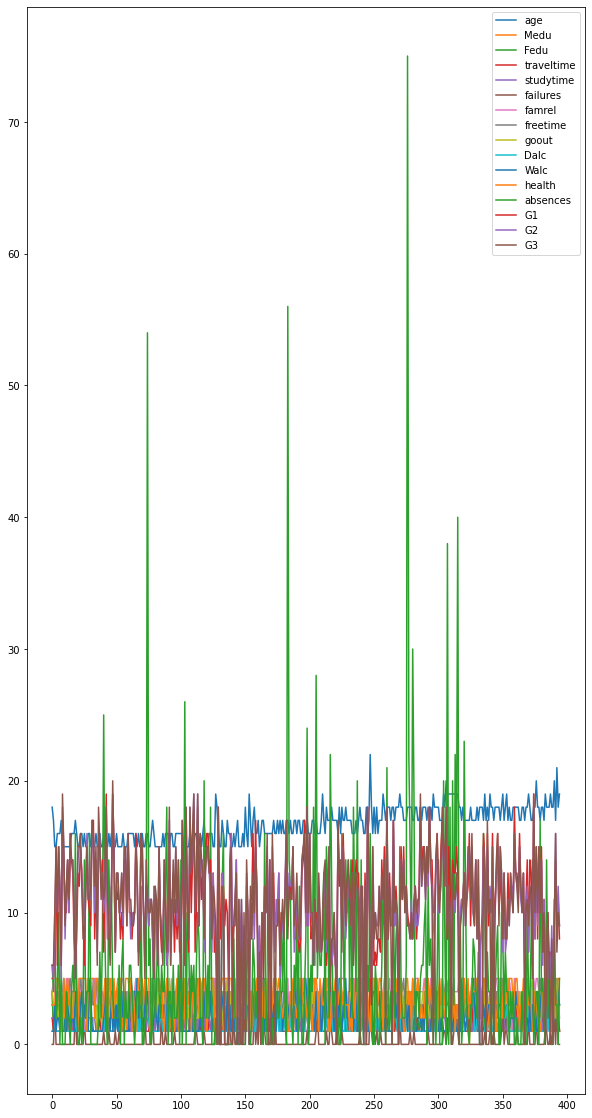

In [6]:
data.plot(figsize=(10,20))

In [7]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
school=pd.get_dummies(data['school'],drop_first=True)

In [9]:
sex=pd.get_dummies(data['sex'],drop_first=True)

In [10]:
address=pd.get_dummies(data['address'],drop_first=True)
famsize=pd.get_dummies(data['famsize'],drop_first=True)
Pstatus=pd.get_dummies(data['Pstatus'],drop_first=True)
Mjob=pd.get_dummies(data['Mjob'],drop_first=True)
Fjob=pd.get_dummies(data['Fjob'],drop_first=True)

In [11]:
data=data.drop(['school','sex','address','famsize','Pstatus','Mjob','Fjob'],axis=1)

In [12]:
reason=pd.get_dummies(data['reason'],drop_first=True)
guardian=pd.get_dummies(data['guardian'],drop_first=True)
schoolsup=pd.get_dummies(data['schoolsup'],drop_first=True)
famsup=pd.get_dummies(data['famsup'],drop_first=True)

In [13]:
data=data.drop(['reason','guardian','schoolsup','famsup'],axis=1)

In [14]:
data.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,paid,activities,nursery,higher,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,no,no,yes,yes,...,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,no,no,no,yes,...,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,yes,no,yes,yes,...,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,yes,yes,yes,yes,...,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,yes,no,yes,yes,...,4,3,2,1,2,5,4,6,10,10


In [15]:
paid=pd.get_dummies(data['paid'],drop_first=True)
activities=pd.get_dummies(data['activities'],drop_first=True)
nursery=pd.get_dummies(data['nursery'],drop_first=True)
higher=pd.get_dummies(data['higher'],drop_first=True)

In [16]:
data=data.drop(['paid','activities','nursery','higher'],axis=1)

In [17]:
internet=pd.get_dummies(data['internet'],drop_first=True)
romantic=pd.get_dummies(data['romantic'],drop_first=True)

In [18]:
data=data.drop(['internet','romantic'],axis=1)

In [19]:
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [20]:
data=pd.concat([data,school,sex,address,famsize,Pstatus,Fjob,Mjob,reason,guardian],axis=1)

In [21]:
data=pd.concat([data,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic],axis=1)

In [22]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,mother,other,yes,yes,yes,yes,yes,yes,yes,yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         395 non-null    int64
 1   Medu        395 non-null    int64
 2   Fedu        395 non-null    int64
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
 6   famrel      395 non-null    int64
 7   freetime    395 non-null    int64
 8   goout       395 non-null    int64
 9   Dalc        395 non-null    int64
 10  Walc        395 non-null    int64
 11  health      395 non-null    int64
 12  absences    395 non-null    int64
 13  G1          395 non-null    int64
 14  G2          395 non-null    int64
 15  G3          395 non-null    int64
 16  MS          395 non-null    uint8
 17  M           395 non-null    uint8
 18  U           395 non-null    uint8
 19  LE3         395 non-null    uint8
 20  T           395 non-null    uint

In [24]:
grade=data['G1']

In [25]:
grade=pd.concat([grade,data['G2'],data['G3']],axis=1)

In [26]:
grade

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
390,9,9,9
391,14,16,16
392,10,8,7
393,11,12,10


In [27]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      395 non-null    int64
 1   G2      395 non-null    int64
 2   G3      395 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB


In [28]:
 sum=((grade['G1']+grade['G2']+grade['G3'])/3).astype(int)
sum

0       5
1       5
2       8
3      14
4       8
       ..
390     9
391    15
392     8
393    11
394     8
Length: 395, dtype: int32

In [29]:
X=data.drop(['G1','G2','G3'],axis=1)

In [30]:
y=sum

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
def exp(model):
    model.predict(X_train,y_train)
    model.score(X_test,y_test)

In [34]:
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,mother,other,yes,yes,yes,yes,yes,yes,yes,yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [35]:
y

0       5
1       5
2       8
3      14
4       8
       ..
390     9
391    15
392     8
393    11
394     8
Length: 395, dtype: int32